# Edible Poisonous Mushroom Image Classifier

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


/Users/admin/Dropbox/Second Year/Software Engineering/Assessment/shrooming/shroomEPImagesAdditional


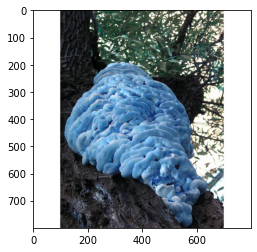

In [2]:
import pathlib
myFile = 'shroomEPImagesAdditional'
data_dir = os.path.abspath("./" + myFile) 
print(data_dir)


categories = ['edible', 'poisonous']
#loop through category names
for category in categories:
    #append category name from array into the full path
    path = os.path.join(data_dir, category)
    #loop through each image within the full path
    for img in os.listdir(path):
        #add images to array
        img_array = cv2.imread(os.path.join(path,img))
        #display data as an image
        plt.imshow(img_array)
        plt.show
        break
    break
    #display image
    print(img_array)

In [3]:
batch_size = 32
img_height = 180
img_width = 180

import pathlib
myFile = 'shroomEPImagesAdditional'
data_dir = os.path.abspath("./" + myFile) # or similar, depending on your scenario


In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1184 files belonging to 2 classes.
Using 948 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1184 files belonging to 2 classes.
Using 236 files for validation.


In [6]:
#verify class names are correct
class_names = train_ds.class_names
print(class_names)

['edible', 'poisonous']


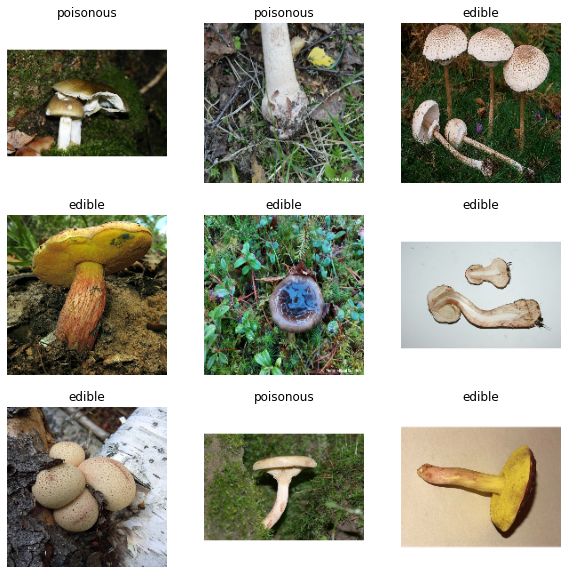

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# Configuring the dataset for performance:

Using Dataset.cache() we can keep images in memor after they have been loaded during the first epoch.
Keeping the images in memory ensures there is no bottleneck when training the model.

Using Dataset.prefetch() overlaps data preprocessing and model execution while training

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Creating the model:

In [10]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compile the model:

Currently using adam optimiser

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [13]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
30/30 [==============================] - 27s 700ms/step - loss: 0.8768 - accuracy: 0.6611 - val_loss: 0.4776 - val_accuracy: 0.7839
Epoch 2/10
30/30 [==============================] - 24s 814ms/step - loss: 0.5396 - accuracy: 0.7098 - val_loss: 0.5018 - val_accuracy: 0.7585
Epoch 3/10
30/30 [==============================] - 21s 695ms/step - loss: 0.5056 - accuracy: 0.7450 - val_loss: 0.4744 - val_accuracy: 0.7839
Epoch 4/10
30/30 [==============================] - 21s 700ms/step - loss: 0.4532 - accuracy: 0.7975 - val_loss: 0.4940 - val_accuracy: 0.7500
Epoch 5/10
30/30 [==============================] - 21s 696ms/step - loss: 0.3935 - accuracy: 0.7878 - val_loss: 0.5027 - val_accuracy: 0.7542
Epoch 6/10
30/30 [==============================] - 20s 655ms/step - loss: 0.3217 - accuracy: 0.8641 - val_loss: 0.5138 - val_accuracy: 0.8220
Epoch 7/10
30/30 [==============================] - 20s 663ms/step - loss: 0.2585 - accuracy: 0.8912 - val_loss: 0.6637 - val_accuracy: 0.7627

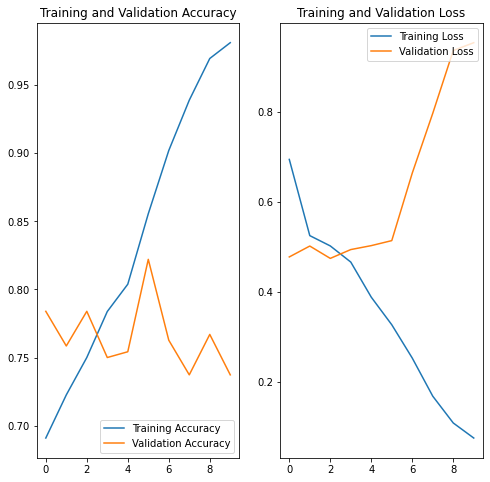

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

predict on new data:

In [15]:
mushroom_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCNEyMK_tgLK3bF-zKcHG5loKontPWeNhLcA&usqp=CAU"
mushroom_path = tf.keras.utils.get_file('test_shroom', origin =mushroom_url)

img = keras.preprocessing.image.load_img(
    mushroom_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to poisonous with a 52.82 percent confidence.


# Iterative development techniques:

## Data Augmentation

Validation stalls in between 60-70%, which is a sign of overfitting, this is likely due to the small number of training samples.

One way to artificially increase the number of training samples is to generate more augmented versions of the existing mushroom photos.

In [16]:
data_augmentation = keras.Sequential(
[
 layers.experimental.preprocessing.RandomFlip("horizontal",
                                             input_shape=(img_height,
                                                         img_width,
                                                         3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
]
)

Visualise the augmented examples:

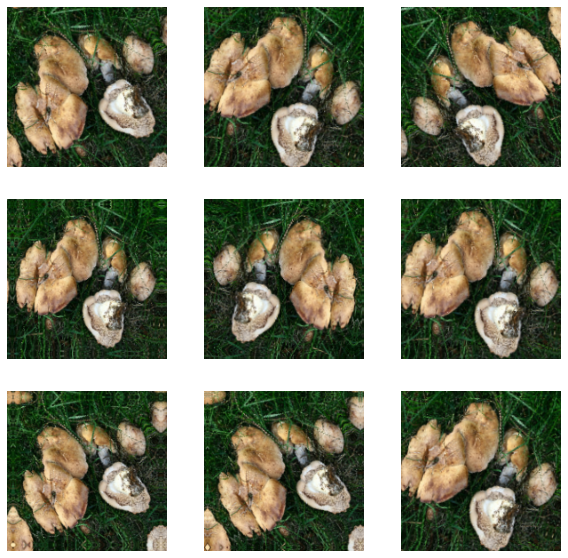

In [17]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Add Dropout

another technique to reduce overfitting is by using a form of regularisation known as Dropout.
Dropout randomly sets the activation number of output units from the layer to 0 during the training process.

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Below is a model that is used in another mushroom classification project

In [18]:
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
  

Compiling altered model:

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [21]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
30/30 [==============================] - 25s 810ms/step - loss: 1.3349 - accuracy: 0.6108 - val_loss: 0.4968 - val_accuracy: 0.7839
Epoch 2/10
30/30 [==============================] - 23s 759ms/step - loss: 0.5640 - accuracy: 0.7195 - val_loss: 0.4701 - val_accuracy: 0.7839
Epoch 3/10
30/30 [==============================] - 24s 803ms/step - loss: 0.5546 - accuracy: 0.7197 - val_loss: 0.4843 - val_accuracy: 0.7839
Epoch 4/10
30/30 [==============================] - 23s 778ms/step - loss: 0.5389 - accuracy: 0.7203 - val_loss: 0.4671 - val_accuracy: 0.7839
Epoch 5/10
30/30 [==============================] - 23s 757ms/step - loss: 0.5336 - accuracy: 0.7117 - val_loss: 0.4682 - val_accuracy: 0.7839
Epoch 6/10
30/30 [==============================] - 22s 736ms/step - loss: 0.5531 - accuracy: 0.7007 - val_loss: 0.4615 - val_accuracy: 0.7839
Epoch 7/10
30/30 [==============================] - 22s 740ms/step - loss: 0.5156 - accuracy: 0.7216 - val_loss: 0.4590 - val_accuracy: 0.7839

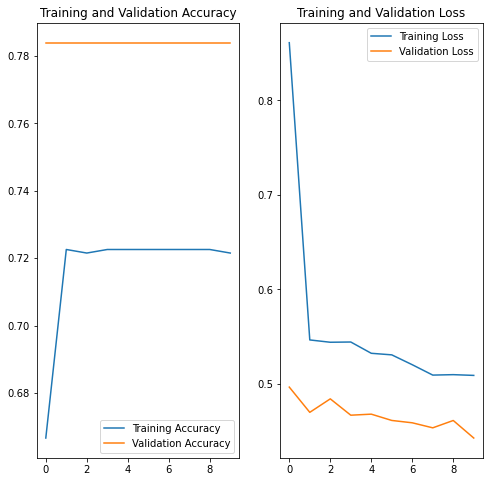

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
#mushroom url variable to paste in images of mushroom to be classified
mushroom_url = "https://www.lovethegarden.com/sites/default/files/content/articles/UK_oyster-mushrooms-growing.jpg"
#get everything after the last ' / ' in the url to be used as filename
file_name = mushroom_url.rsplit('/',1)[-1]
mushroom_path = tf.keras.utils.get_file(file_name, origin =mushroom_url)

img = keras.preprocessing.image.load_img(
    mushroom_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to edible with a 76.50 percent confidence.
